**Short-term Memory**

In this coding session we'll implement a **short-term memory**, from a very basic solution to more advanced approaches.

In [1]:
import os
import os
os.environ["GROQ_API_KEY"] = "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"
print("Groq key:", os.getenv("GROQ_API_KEY"))


Groq key: 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


Let's implement a very simple workflow to understand how the logic works. We'll start by creating a simple node that contains the LLM call.



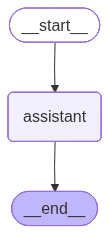

In [8]:
from langchain_groq import ChatGroq
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langgraph.graph import START,END,StateGraph
from IPython.display import Image,display

llm = ChatGroq(model = "llama-3.3-70b-versatile")

def assitant(state:MessagesState):
    return {"messages":llm.invoke(state["messages"])}

workflow = StateGraph(MessagesState)
workflow.add_node("assistant",assitant)
workflow.add_edge(START,"assistant")
workflow.add_edge("assistant",END)

graph = workflow.compile()
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))



In [9]:
messages = [HumanMessage(content="Hello,My Name is Taha")]
messages= graph.invoke({"messages":messages})

for message in messages["messages"]:
    message.pretty_print()


================================ Human Message =================================

Hello,My Name is Taha
================================== Ai Message ==================================

Hello Taha, it's nice to meet you. Is there something I can help you with or would you like to chat?


But ... what happens if I ask again my name?



In [10]:
message = [HumanMessage(content = "Remember my name")]
messages= graph.invoke({"messages":message})
for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Remember my name
================================== Ai Message ==================================

I don't have personal memories, so I don't recall you telling me your name before. Each time you interact with me, it's a new conversation. If you'd like to share your name with me now, I'd be happy to chat with you and address you by your name during this conversation. What's your name?
